In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [75]:
# Get table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [76]:
# Get column names of measurement table
m_cols = inspector.get_columns('measurement')
for c in m_cols:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [78]:
# Get column names of station table
s_cols = inspector.get_columns('station')
for c in s_cols:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [21]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [52]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Perform a query to retrieve the data and precipitation scores, sort by date
sel = [Measurement.date, 
       Measurement.prcp]
prcp_data = session.query(*sel).\
    filter(func.strftime(Measurement.date) <= "2017-08-23", func.strftime(Measurement.date) >= "2016-08-23").\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()
prcp_data

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [63]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_data, columns=['date', 'prcp'])
prcp_df.set_index('date')

prcp_df

date  prcp
0    2016-08-23  0.00
1    2016-08-24  0.08
2    2016-08-25  0.08
3    2016-08-26  0.00
4    2016-08-27  0.00
..          ...   ...
361  2017-08-19  0.00
362  2017-08-20  0.00
363  2017-08-21  0.00
364  2017-08-22  0.00
365  2017-08-23  0.00

[366 rows x 2 columns]

In [54]:
# Sort the dataframe by date
prcp_by_date = prcp_df.groupby(by = 'date')

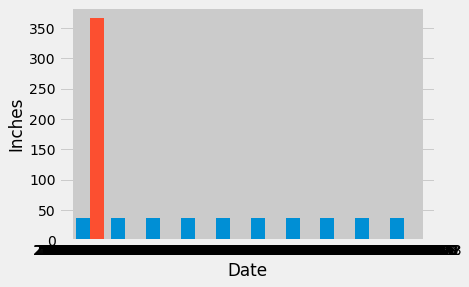

In [64]:
# Use Pandas Plotting with Matplotlib to plot the data
#x_axis_prcp = prcp_df['date']
#y_axis_prcp = prcp_by_date.prcp
#plt.bar(x_axis_prcp, y_axis_prcp, color="b", align="center")
#x_axis_prcp

plt.hist(prcp_df)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data


# Exploratory Station Analysis

In [83]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station).count()

9

In [80]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)

# Join Measurement and Station on station column
sel = [Station.name, Measurement.date, Measurement.prcp, Measurement.tobs]
same_station = session.query(*sel).filter(Measurement.station == Station.station).all()

same_station

# List the stations and the counts in descending order.


[('WAIKIKI 717.2, HI US', '2010-01-01', 0.08, 65.0),
 ('WAIKIKI 717.2, HI US', '2010-01-02', 0.0, 63.0),
 ('WAIKIKI 717.2, HI US', '2010-01-03', 0.0, 74.0),
 ('WAIKIKI 717.2, HI US', '2010-01-04', 0.0, 76.0),
 ('WAIKIKI 717.2, HI US', '2010-01-06', None, 73.0),
 ('WAIKIKI 717.2, HI US', '2010-01-07', 0.06, 70.0),
 ('WAIKIKI 717.2, HI US', '2010-01-08', 0.0, 64.0),
 ('WAIKIKI 717.2, HI US', '2010-01-09', 0.0, 68.0),
 ('WAIKIKI 717.2, HI US', '2010-01-10', 0.0, 73.0),
 ('WAIKIKI 717.2, HI US', '2010-01-11', 0.01, 64.0),
 ('WAIKIKI 717.2, HI US', '2010-01-12', 0.0, 61.0),
 ('WAIKIKI 717.2, HI US', '2010-01-14', 0.0, 66.0),
 ('WAIKIKI 717.2, HI US', '2010-01-15', 0.0, 65.0),
 ('WAIKIKI 717.2, HI US', '2010-01-16', 0.0, 68.0),
 ('WAIKIKI 717.2, HI US', '2010-01-17', 0.0, 64.0),
 ('WAIKIKI 717.2, HI US', '2010-01-18', 0.0, 72.0),
 ('WAIKIKI 717.2, HI US', '2010-01-19', 0.0, 66.0),
 ('WAIKIKI 717.2, HI US', '2010-01-20', 0.0, 66.0),
 ('WAIKIKI 717.2, HI US', '2010-01-21', 0.0, 69.0),
 ('WAIKI

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [16]:
# Close Session
session.close()